In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [155]:
data = pd.read_csv('v4_smh.csv', encoding='euc-kr')
data

,회사명,거래소코드,회계년도,산업코드,업종코드,소속코드,상장일,상장폐지일,감사의견코드,감사의견
0,(주)CMG제약,58820,2001.12.1,32102.0,1.0,5.0,2001.8.31,NaN,UQ,NaN
1,(주)CMG제약,58820,2002.12.1,32102.0,1.0,5.0,2001.8.31,NaN,UQ,NaN
2,(주)CMG제약,58820,2003.12.1,32102.0,1.0,5.0,2001.8.31,NaN,UQ,NaN
3,(주)CMG제약,58820,2004.12.1,32102.0,1.0,5.0,2001.8.31,NaN,UQ,NaN
4,(주)CMG제약,58820,2005.12.1,32102.0,1.0,5.0,2001.8.31,NaN,UQ,NaN
...,...,...,...,...,...,...,...,...,...,...
34869,흥아해운(주),3280,2016.12.1,85001.0,1.0,1.0,1976.6.29,NaN,UQ,NaN
34870,흥아해운(주),3280,2017.12.1,85001.0,1.0,1.0,1976.6.29,NaN,UQ,NaN
34871,흥아해운(주),3280,2018.12.1,85001.0,1.0,1.0,1976.6.29,NaN,UQ,NaN
34872,흥아해운(주),3280,2019.12.1,85001.0,1.0,1.0,1976.6.29,NaN,DU,NaN


In [156]:
# 해당 코드 2줄은 회계년월의 값이 회계년도의 값과 동일한지 확인하고 싶어서 작성한 부분임.
# 회계년월의 nan이 있다면, 값이 다르겠지만 입력되어 있는 값은 동일하지 않을까 생각하고 진행함.
# 결과를 확인하면 두 코드의 출력값이 동일하므로 nan이 있는 회계년월은 삭제하도록 함
# data['회계년월'].isna().value_counts()
# (data['회계년월'] == data['회계년도']).value_counts()

In [157]:
data = data[~data['업종코드'].isnull()]

In [158]:
data['업종코드'] = data['업종코드'].astype(int)
data['소속코드'] = data['소속코드'].astype(int)
data['산업코드'] = data['산업코드'].astype(int)

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/396002100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['업종코드'] = data['업종코드'].astype(int)
/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/396002100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소속코드'] = data['소속코드'].astype(int)
/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/396002100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [159]:
data['업종코드'] = data['업종코드'].astype(str).str.zfill(2)
data['소속코드'] = data['소속코드'].astype(str).str.zfill(2)
data['산업코드'] = data['산업코드'].astype(str).str.zfill(6)
data['거래소코드'] = data['거래소코드'].astype(str).str.zfill(6)

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/326604085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['업종코드'] = data['업종코드'].astype(str).str.zfill(2)
/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/326604085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소속코드'] = data['소속코드'].astype(str).str.zfill(2)
/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/326604085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [160]:
data['산업대분류'] = data['산업코드'].str[0:2]

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/822201598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['산업대분류'] = data['산업코드'].str[0:2]


In [161]:
data

,회사명,거래소코드,회계년도,산업코드,업종코드,소속코드,상장일,상장폐지일,감사의견코드,감사의견,산업대분류
0,(주)CMG제약,058820,2001.12.1,032102,01,05,2001.8.31,NaN,UQ,NaN,03
1,(주)CMG제약,058820,2002.12.1,032102,01,05,2001.8.31,NaN,UQ,NaN,03
2,(주)CMG제약,058820,2003.12.1,032102,01,05,2001.8.31,NaN,UQ,NaN,03
3,(주)CMG제약,058820,2004.12.1,032102,01,05,2001.8.31,NaN,UQ,NaN,03
4,(주)CMG제약,058820,2005.12.1,032102,01,05,2001.8.31,NaN,UQ,NaN,03
...,...,...,...,...,...,...,...,...,...,...,...
34869,흥아해운(주),003280,2016.12.1,085001,01,01,1976.6.29,NaN,UQ,NaN,08
34870,흥아해운(주),003280,2017.12.1,085001,01,01,1976.6.29,NaN,UQ,NaN,08
34871,흥아해운(주),003280,2018.12.1,085001,01,01,1976.6.29,NaN,UQ,NaN,08
34872,흥아해운(주),003280,2019.12.1,085001,01,01,1976.6.29,NaN,DU,NaN,08


In [104]:
# 소속코드가 03, 06인 회사의 상장폐지일이 있는지 확인하는 코드
# data.loc[data['소속코드'] == '03']['상장폐지일'].values
# data.loc[data['소속코드'] == '06']['상장폐지일'].value_counts()

### 데이터 전처리 완료
## 부도 데이터 선정

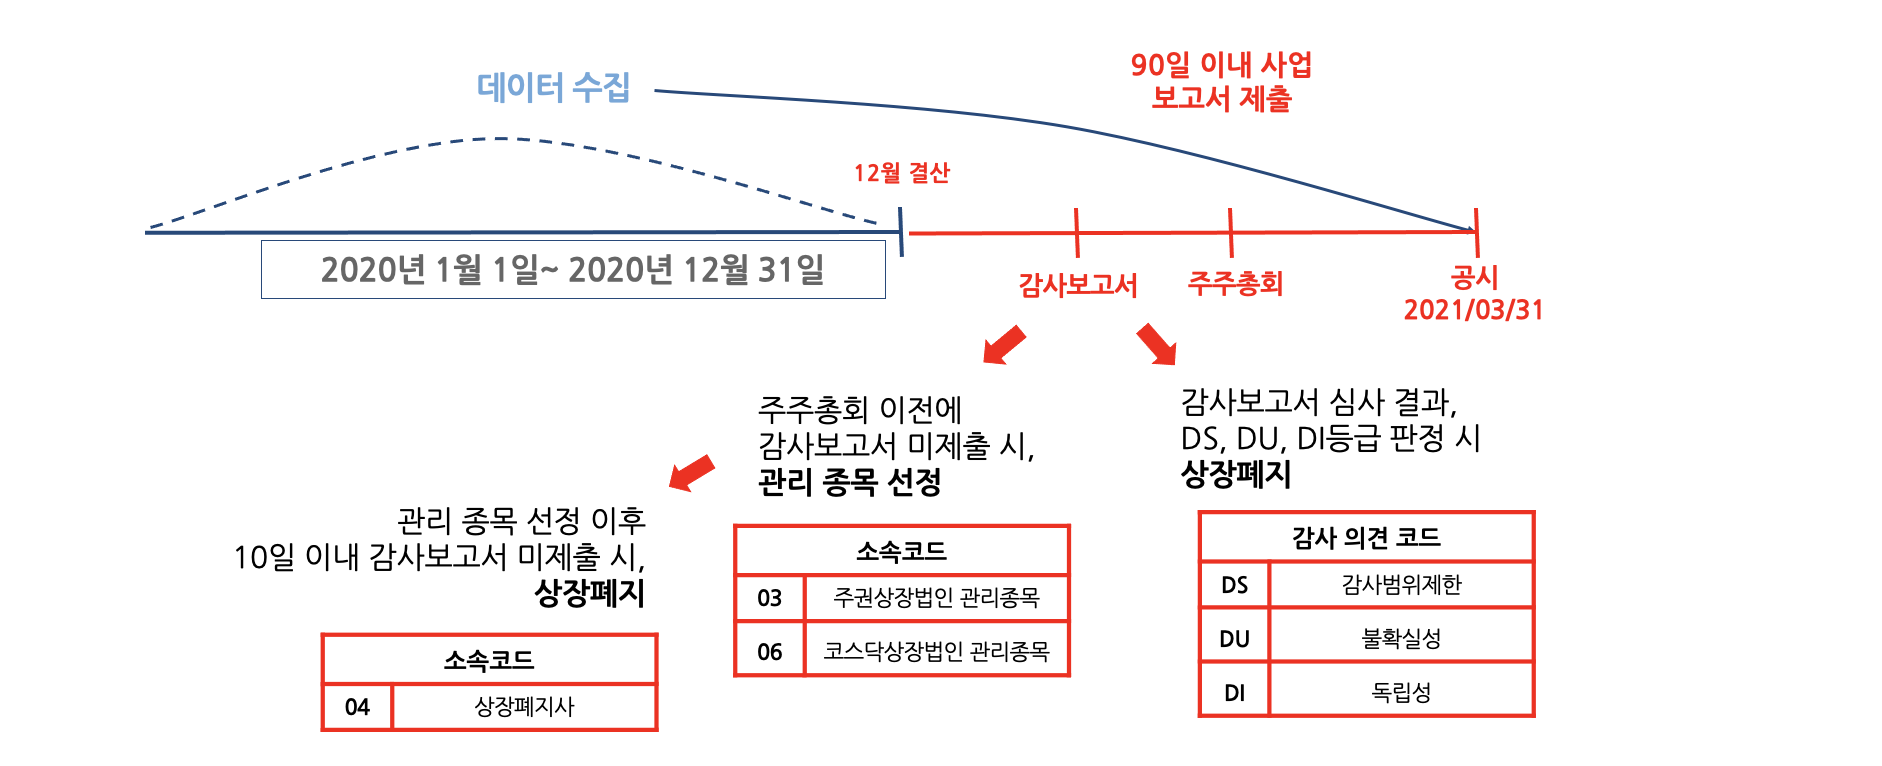

In [90]:
import IPython
url = "https://user-images.githubusercontent.com/87803612/143540922-772b263b-4e5e-42e5-9295-e7200d60f044.png"
IPython.display.Image(url, width = 941)

## case 1
- 소속코드로 뽑은 후, 감사의견 DS, DU를 뽑는 경우

## case 2
- 감사의견 DS,DU를 뽑은 후 소속코드로 뽑는 경우

두 경우를 비교해보고 더 많은 기업을 뽑는 경우를 체택한다.

In [113]:
# case_1
a1 = data.loc[data['소속코드'] == '04']
a2 = data.loc[data['소속코드'] == '06']
a3 = data.loc[data['소속코드'] == '03']
a_1 = pd.concat([a1,a2,a3])

a_1.sort_values(by=['회계년도'], inplace=True)
a_1.reset_index(inplace = True)
a_1.drop(columns='index', inplace =True)

In [114]:
# DS(감사범위제한 : 감사자료 미비로 감사 범위 제한에 중대한 의문), DU(감사불확실성 : 계속기업가정에 중대한 의문)
b1 = a_1.loc[a_1['감사의견코드'] == "DS"]  
b2 = a_1.loc[a_1['감사의견코드'] == "DU"]

b_1 = pd.concat([b1, b2])

b_1.sort_values(by=['회계년도'], inplace=True)
b_1.reset_index(inplace = True)
b_1.drop(columns='index', inplace =True)

In [115]:
c1 = b_1.loc[b_1['산업대분류'] == '03']
c2 = b_1.loc[b_1['산업대분류'] == '10']
c3 = b_1.loc[b_1['산업대분류'] == '07']

case_1 = pd.concat([c1,c2,c3])
case_1['TF'] = case_1['회사명'].duplicated()

In [116]:
unique_1 = case_1.loc[case_1['TF'] == False]
duplic_1 = case_1.loc[case_1['TF'] == True]

print(len(unique_1), len(duplic_1))

300 28


In [118]:
# case 2
A1 = data.loc[data['감사의견코드'] == "DS"]  
A2 = data.loc[data['감사의견코드'] == "DU"]

a_2 = pd.concat([A1, A2])

a_2.sort_values(by=['회계년도'], inplace=True)
a_2.reset_index(inplace = True)
a_2.drop(columns='index', inplace =True)

In [119]:
B1 = a_2.loc[a_2['소속코드'] == '04']
B2 = a_2.loc[a_2['소속코드'] == '06']
B3 = a_2.loc[a_2['소속코드'] == '03']
b_2 = pd.concat([B1,B2,B3])

b_2.sort_values(by=['회계년도'], inplace=True)
b_2.reset_index(inplace = True)
b_2.drop(columns='index', inplace =True)

In [120]:
C1 = b_2.loc[b_2['산업대분류'] == '03']
C2 = b_2.loc[b_2['산업대분류'] == '10']
C3 = b_2.loc[b_2['산업대분류'] == '07']

case_2 = pd.concat([C1,C2,C3])
case_2['TF'] = case_2['회사명'].duplicated()

In [121]:
unique_2 = case_2.loc[case_2['TF'] == False]
duplic_2 = case_2.loc[case_2['TF'] == True]

print(len(unique_2), len(duplic_2))

300 28


In [129]:
# plt.subplot(121)
# sns.countplot(x=unique_1['소속코드'], data=unique_1)
# plt.grid(axis='y', alpha=.5)
# plt.xlabel('industrial code')
# plt.ylabel('count')
# plt.ylim(0,450)
# plt.suptitle('from TS2000')
# plt.title('unique_1 firm')
# plt.subplot(122)
# sns.countplot(x=unique_2['소속코드'], data=unique_2)
# plt.grid(axis='y', alpha=.5)
# plt.xlabel('industrial code')
# plt.ylabel('count')
# plt.ylim(0,450)
# plt.title('unique_2 firm')
# plt.show()

In [125]:
print(unique_1['소속코드'].value_counts())
print(unique_2['소속코드'].value_counts())

04    257
06     39
03      4
Name: 소속코드, dtype: int64
04    257
06     39
03      4
Name: 소속코드, dtype: int64


In [130]:
# plt.suptitle('belong code of firm')

# plt.subplot(121)
# sns.countplot(x=new['소속코드'], data=new)
# plt.grid(axis='y', alpha=.5)
# plt.xlabel('belong code of unique firm')
# plt.title('unique firm')
# plt.ylim(0,550)

# plt.subplot(122)
# sns.countplot(x=new2['소속코드'], data=new2)
# plt.grid(axis='y', alpha=.5)
# plt.xlabel('belong code of duplicated firm')
# plt.title('duplicated firm')
# plt.ylim(0,550)
# plt.show()


## 결론 

부도기업의 정의를 DS, DU받은 기업 중 소속코드가 04, 06, 03인 기업을 대상으로 한다.


In [162]:
# abc 데이터에는 DS, DU를 받은 기업만 있기 때문에, 산업 대분류만 선택하여 추출한다.
# 산업대분류 03(제조업) ,10(출판업), 07(도소매업) 추출
sub1 = data.loc[data['감사의견코드'] == "DS"]  
sub2 = data.loc[data['감사의견코드'] == "DU"]

abc = pd.concat([sub1, sub2])

abc.reset_index(inplace=True)
abc.drop(columns='index', inplace = True)
abc.sort_values(by=['회계년도'], inplace=True)
abc.reset_index(inplace = True)
abc.drop(columns='index', inplace =True)

a1 = abc.loc[abc['소속코드'] == '04']
a2 = abc.loc[abc['소속코드'] == '06']
a3 = abc.loc[abc['소속코드'] == '03']
total1 = pd.concat([a1,a2,a3])

b1 = total1.loc[total1['산업대분류'] == '03'] 
b2 = total1.loc[total1['산업대분류'] == '10']
b3 = total1.loc[total1['산업대분류'] == '07']

total = pd.concat([b1, b2, b3])

v1 = pd.DataFrame(total['감사의견코드'].value_counts())
v2 = pd.DataFrame(total['산업대분류'].value_counts())
v3 = pd.DataFrame(total['소속코드'].value_counts())

total['TF'] = total['회사명'].duplicated()


In [163]:
unique_firm = total.loc[total['TF'] == False]
duplic_firm = total.loc[total['TF'] == True]

print(len(unique_firm), len(duplic_firm))

300 28


In [164]:
unique_firm['회계년도_new'] = unique_firm['회계년도'].str[0:4]
unique_firm.sort_values(by=['회계년도_new'], inplace = True)
unique_firm.reset_index(inplace=True)
unique_firm.drop(columns=['index', 'TF'], inplace=True)

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_1496/3452251105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_firm['회계년도_new'] = unique_firm['회계년도'].str[0:4]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [165]:
unique_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   회사명       300 non-null    object
 1   거래소코드     300 non-null    object
 2   회계년도      300 non-null    object
 3   산업코드      300 non-null    object
 4   업종코드      300 non-null    object
 5   소속코드      300 non-null    object
 6   상장일       300 non-null    object
 7   상장폐지일     257 non-null    object
 8   감사의견코드    300 non-null    object
 9   감사의견      232 non-null    object
 10  산업대분류     300 non-null    object
 11  회계년도_new  300 non-null    object
dtypes: object(12)
memory usage: 28.2+ KB


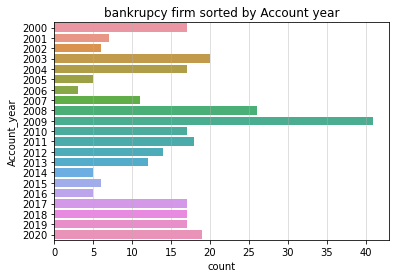

In [166]:
sns.countplot(y=unique_firm['회계년도_new'], data=unique_firm)
plt.ylabel('Account_year')
plt.title('bankrupcy firm sorted by Account year')
plt.grid(axis='x', alpha = .5)
plt.show()

In [167]:
unique_firm

,회사명,거래소코드,회계년도,산업코드,업종코드,소속코드,상장일,상장폐지일,감사의견코드,감사의견,산업대분류,회계년도_new
0,(주)바로크가구,017120,2000.12.1,033201,01,04,1989.12.18,2001.7.10,DU,"경상손실 23,819백만원 발생, 총자산을 초과한 총부채액이 132,195백만원 발...",03,2000
1,쌍용자동차(주),003620,2000.12.1,033001,01,03,1975.5.21,NaN,DU,"영업손실 259,221백만원 총자산을 초과한 총부채액이 949,281백만원이 발생....",03,2000
2,(주)골드앤에스,035290,2000.12.1,105801,01,06,1999.12.7,NaN,DU,"경상손실 8,098백만원 이상, 유동자산을 초과하는 유동부채가 6,657백만원 이상...",10,2000
3,(주)대우,003810,2000.12.1,074607,01,04,1977.6.30,2001.5.23,DU,"총부채가 총자산보다 14,031,384백만원 초과,누적결손금이 14,917,023백...",07,2000
4,(주)태화쇼핑,015880,2000.12.1,074701,01,04,1994.11.5,2001.9.22,DU,"경상순손실 22,543백만원 상거래 정리채권 5,996백만원 이자 4,756백만원 미상환",07,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,(주)센트럴인사이트,012600,2020.12.1,032901,01,03,1990.7.10,NaN,DS,NaN,03,2020
296,(주)소리바다,053110,2020.12.1,106301,01,06,2001.10.9,NaN,DS,NaN,10,2020
297,(주)씨오더블유오엔,056000,2020.12.1,105802,01,06,2003.7.11,NaN,DS,NaN,10,2020
298,(주)유테크,178780,2020.12.1,074608,01,06,2015.6.30,NaN,DS,NaN,07,2020


In [168]:
aa1 = pd.DataFrame(unique_firm['회계년도_new'].value_counts())
aa1

,회계년도_new
2009,41
2008,26
2003,20
2020,19
2011,18
2019,17
2018,17
2017,17
2000,17
2004,17


In [169]:
unique_firm.to_csv('unique_firm.csv')